# Demo 03: Basic Summary Stats

In this demo we'll go over how to do basic summary stats in Pandas. This will help us do more Exploratory Data Analysis (EDA) on our data

In [1]:
# clone the course repository, change to right directory, and import libraries.
%cd /content
!git clone https://github.com/nmattei/cmps3160.git
%cd /content/cmps3160/_demos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# Make the fonts a little bigger in our graphs.
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['pdf.fonttype'] = 42

/content
Cloning into 'cmps3160'...
remote: Enumerating objects: 1629, done.
remote: Counting objects: 100% (519/519), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 1629 (delta 310), reused 428 (delta 254), pack-reused 1110
Receiving objects: 100% (1629/1629), 41.22 MiB | 21.36 MiB/s, done.
Resolving deltas: 100% (911/911), done.
/content/cmps3160/_demos


The cell below loads up a few libraries and does some initialization.  In this notebook we'll do a few basic data manipulations and see the Pandas formatting for the first time and make some simple graphs.


## Working with some real data and Pandas!

Opening and reading CSV files is very easy with Pandas [Read CSV Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In general the [Pandas Documentation](https://pandas.pydata.org/docs/) is very good and you should spend some time getting to know it. You can also use the cheatsheets that we have posted on the [course webpage](https://nmattei.github.io/cmps3160/).

Last class we only worked with the salaries dataset, this time let's work with some more data including stats!

In [2]:
# Open the NBA Salaries file.

df_nba = pd.read_csv("./data/nba_stats.csv")
df_nba.head()

,Season,Name,Salary,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1995,A.C. Green,6473000.0,SF,31,PHO,82,52,2687,311,...,0.732,194,475,669,127,55,31,114,146,916
1,1995,Aaron McKie,845000.0,SG,22,POR,45,20,827,116,...,0.685,35,94,129,89,36,16,39,97,293
2,1995,Aaron Swinson,NaN,SF,24,PHO,9,0,51,10,...,0.800,3,5,8,3,1,0,5,8,24
3,1995,Aaron Williams,NaN,PF,23,MIL,15,0,72,8,...,0.667,5,14,19,0,2,6,7,14,24
4,1995,Acie Earl,1040000.0,C,24,BOS,30,3,208,26,...,0.483,19,26,45,2,6,8,14,39,66


This dataset has so much to look at! For example.. we can see what the league average salary in a given year is

In [3]:
# Display gives us a basic table.  Note that we can index and slice this in many different ways.
df_nba[(df_nba["Season"] == 1998)]["Salary"]

1571    5125088.0
1572    1430000.0
1573    1430000.0
1574    1430000.0
1575     575000.0
          ...    
2113    1657000.0
2114          NaN
2115          NaN
2116          NaN
2117          NaN
Name: Salary, Length: 547, dtype: float64

In [4]:
# What is the type of the above? What do we want?
type(df_nba[(df_nba["Season"] == 1998)]["Salary"])

pandas.core.series.Series

In [5]:
# What if we want the mean?
df_nba[(df_nba["Season"] == 1998)]["Salary"].mean()

2749682.50867052

In [6]:
# Pandas has support for lots of functions, use the autocomplete to see
df_nba[(df_nba["Season"] == 1998)]["Salary"].describe()

count    3.460000e+02
mean     2.749683e+06
std      2.664120e+06
min      2.500000e+05
25%      1.000000e+06
50%      1.761000e+06
75%      3.667250e+06
max      1.850000e+07
Name: Salary, dtype: float64

In [7]:
# Careful, Pandas will let you do things maybe you shouldn't some times...
df_nba[(df_nba["Season"] == 1998)].mean()

<ipython-input-7-a71562c79049>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_nba[(df_nba["Season"] == 1998)].mean()


Season    1.998000e+03
Salary    2.749683e+06
Age       2.747166e+01
G         4.909141e+01
GS        2.377331e+01
MP        1.164249e+03
FG        1.718995e+02
FGA       3.834333e+02
FG%       4.291875e-01
3P        2.140037e+01
3PA       6.220475e+01
3P%       2.476600e-01
2P        1.504991e+02
2PA       3.212285e+02
2P%       4.466489e-01
FT        9.243510e+01
FTA       1.253071e+02
FT%       7.111505e-01
ORB       6.245704e+01
DRB       1.358355e+02
TRB       1.982925e+02
AST       1.067294e+02
STL       4.036563e+01
BLK       2.395978e+01
TOV       7.199269e+01
PF        1.078976e+02
PTS       4.576344e+02
dtype: float64

In [8]:
# We can also see just some stats if we want to, check the average rebounds and
# salary for 35 year olds.

df_nba[(df_nba["Age"] == 35)][["Name", "TRB","ORB","DRB"]]

,Name,TRB,ORB,DRB
94,Danny Ainge,109,25,84
97,Danny Schayes,208,57,151
125,Dominique Wilkins*,401,157,244
277,Lester Conner,0,0,0
350,Ricky Pierce,64,12,52
...,...,...,...,...
12571,Kyle Korver,187,8,179
12572,Kyle Korver,90,1,89
12573,Kyle Korver,97,7,90
12783,Tony Allen,391,166,225


In [9]:
df_nba[(df_nba["Age"] == 35)][["TRB","ORB","DRB"]].mean()

TRB    185.686792
ORB     48.173585
DRB    137.513208
dtype: float64

<Axes: >

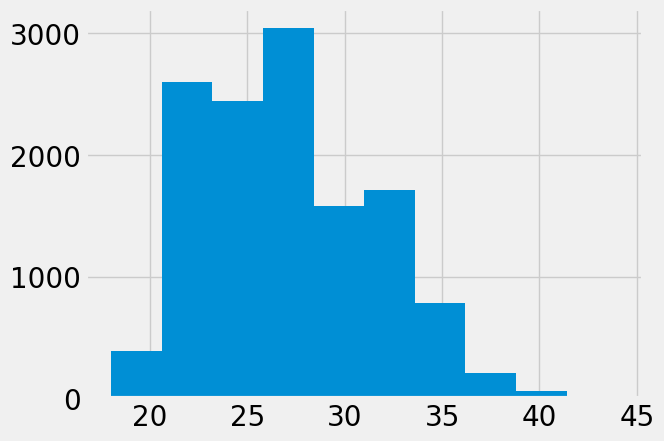

In [10]:
# We can also make fun histograms
df_nba['Age'].hist()

<Axes: >

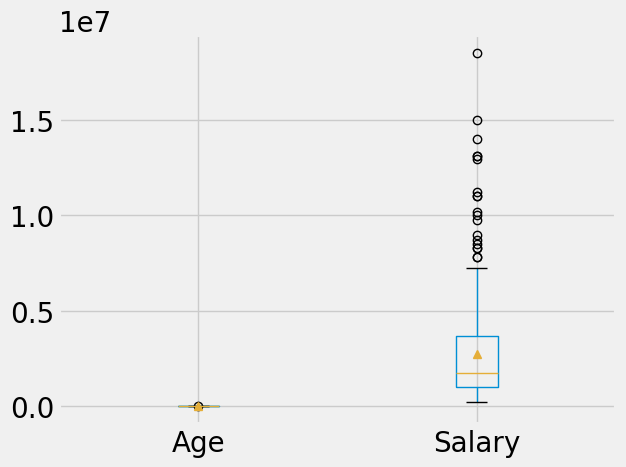

In [11]:
# But we can slice for Season.. sometimes it's good to have boxplots per year.
df_nba[(df_nba["Season"] == 1998)].boxplot(column=["Age","Salary"], showmeans=True)

<Axes: >

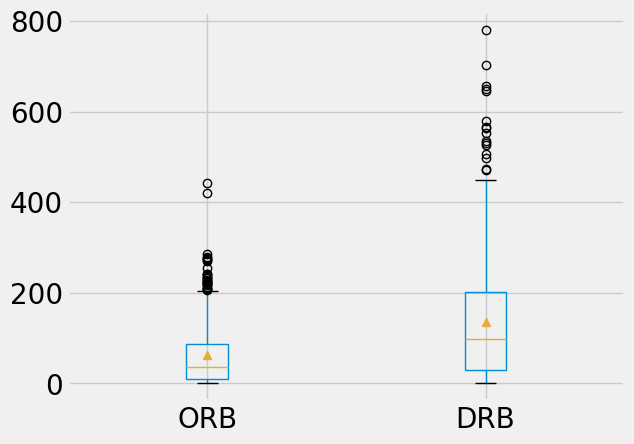

In [12]:
# These are on very different scales, we'll come back to this!

df_nba[(df_nba["Season"] == 1998)].boxplot(column=["ORB","DRB"], showmeans=True)

<Axes: title={'center': 'Salary'}, xlabel='Season'>

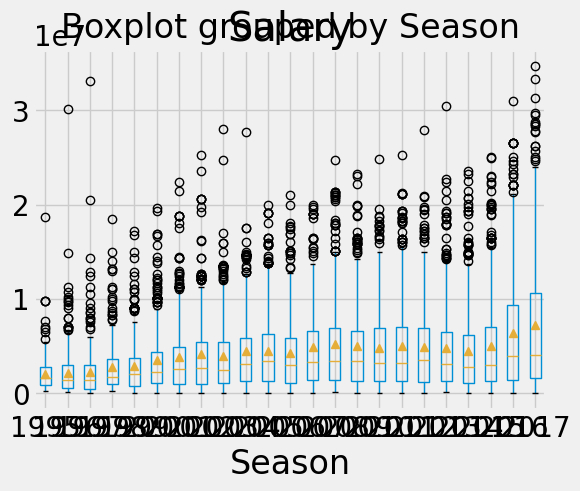

In [13]:
# Very fancy.. though apparently there is a bug in matplotlib? https://github.com/matplotlib/matplotlib/issues/16353
df_nba[["Season","Salary"]].boxplot(column="Salary", by="Season", showmeans=True)

In [14]:
# how can we make this prettier?
df_nba.boxplot?

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]),
 [Text(1, 0, '1995'),
  Text(2, 0, '1996'),
  Text(3, 0, '1997'),
  Text(4, 0, '1998'),
  Text(5, 0, '1999'),
  Text(6, 0, '2000'),
  Text(7, 0, '2001'),
  Text(8, 0, '2002'),
  Text(9, 0, '2003'),
  Text(10, 0, '2004'),
  Text(11, 0, '2005'),
  Text(12, 0, '2006'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2009'),
  Text(16, 0, '2010'),
  Text(17, 0, '2011'),
  Text(18, 0, '2012'),
  Text(19, 0, '2013'),
  Text(20, 0, '2014'),
  Text(21, 0, '2015'),
  Text(22, 0, '2016'),
  Text(23, 0, '2017')])

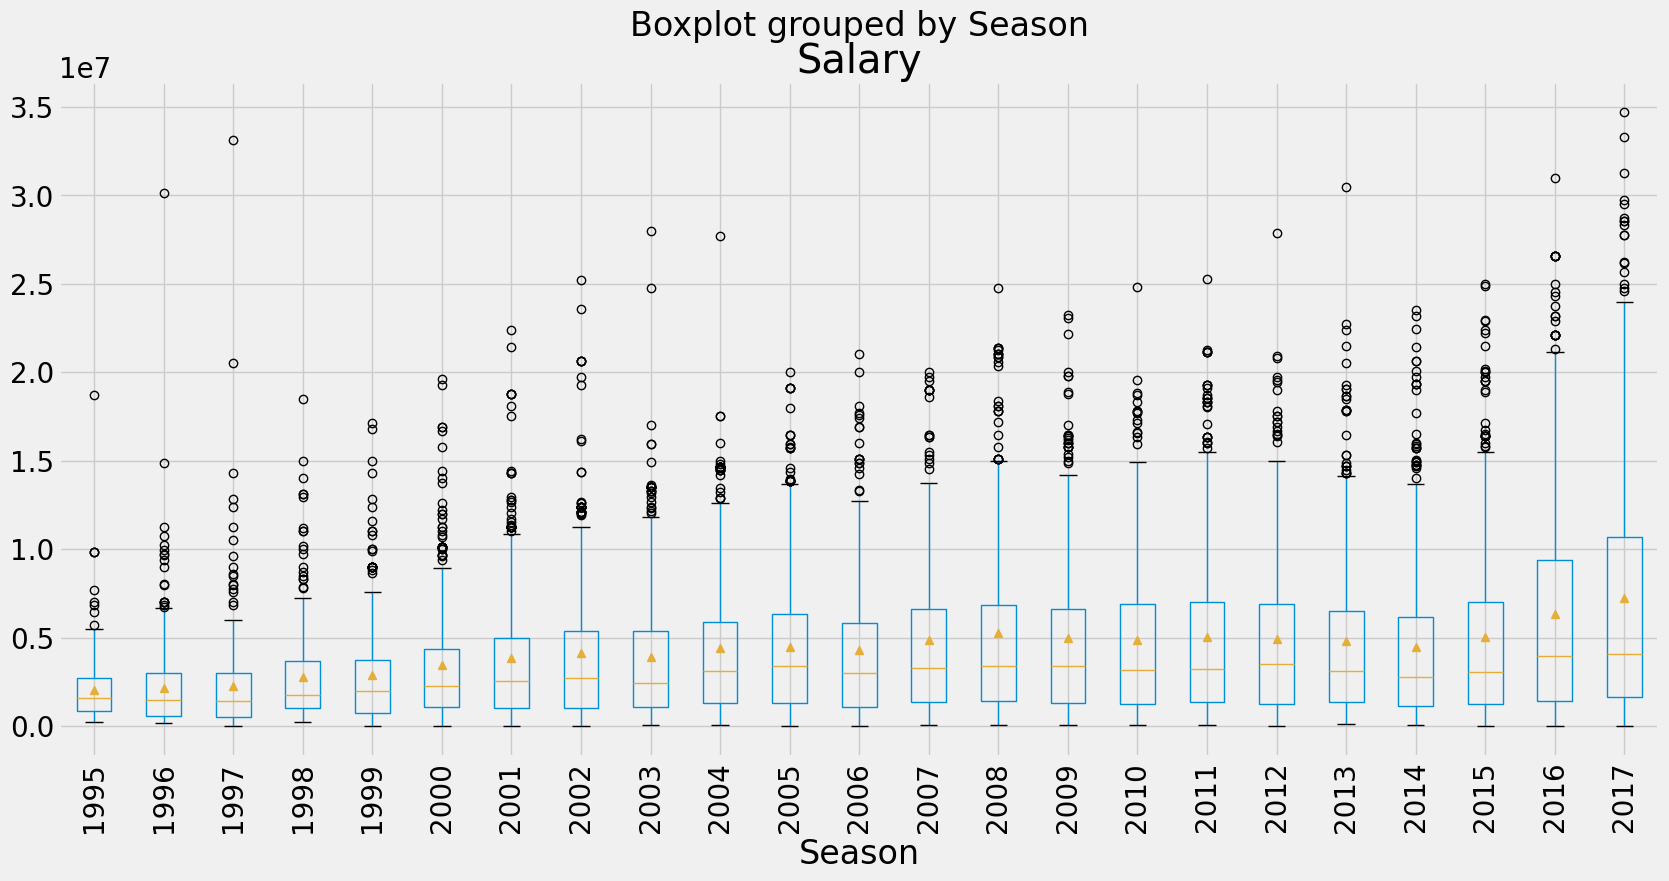

In [15]:
df_nba[["Season","Salary"]].dropna().boxplot(column="Salary", by="Season", figsize=(20,9), showmeans=True)
plt.xticks(rotation=90)

In [16]:
salary_1995 = df_nba[df_nba['Season']==1995]['Salary']
salary_1996 = df_nba[df_nba['Season']==1996]['Salary']
print('average salary in 1995=%.2f and in 1996=%.2f, a difference of %.2f' % (
                                                      salary_1995.mean(),
                                                      salary_1996.mean(),
                                                      salary_1996.mean()-salary_1995.mean()))

average salary in 1995=2012844.24 and in 1996=2169878.44, a difference of 157034.20


In [17]:
def f2c(f):
  # Format float value as currency for pretty printing.
  return '${0:,.2f}'.format(f)

print('average salary in 1995=%s and in 1996=%s, a difference of %s' % (f2c(salary_1995.mean()),
                                                                        f2c(salary_1996.mean()),
                                                                        f2c(salary_1996.mean()-salary_1995.mean())))

average salary in 1995=$2,012,844.24 and in 1996=$2,169,878.44, a difference of $157,034.20


In [18]:
# let's repeat using the median and see the difference...
print('average salary in 1995=%s and in 1996=%s, a difference of %s' % (f2c(salary_1995.median()),
                                                                        f2c(salary_1996.median()),
                                                                        f2c(salary_1996.median()-salary_1995.median())))

average salary in 1995=$1,613,000.00 and in 1996=$1,450,000.00, a difference of $-163,000.00


<br><br><br>

Means and medians are handy for politicians...

<br>

**"The average American family will get a \$4,000 tax cut"**
[source](https://americansfortaxfairness.org/promise-will-middle-class-tax-cut/)

<img width=800 src="https://americansfortaxfairness.org/wp-content/uploads/P2F5-3.png">

<br><br><br>

### A mathemetician, engineer, and accountant are interviewing for a job...

First question: What is 2+2?

**Engineer:** pulls out a slide rule, shuffles it back and forth, and finally announces, “It lies between 3.98 and 4.02”.

**Mathemetician:** “In two hours I can demonstrate it equals 4 with the following short proof.”

**Accountant:** looks at the business owner, then gets out of his chair, checks to see if anyone is listening at the door and pulls the drapes. Then he returns to the business owner, leans across the desk and says in a low voice, “What would you like it to be?”